In [54]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

**
Here first the data is created by looping it with n^3 complextiy then ouput is created and in both padding is done . 5 on input layer and 4 in ouput layer .
Afther this One hot encoding is done for feeding it to the lstm network.
FOr the reversed architecutre a variable i will do it since i have made appropriate changes in the code regarding i to get the reverd part as you can see the code .
In the end the ouput is presented by plotting the accuracy vs epochs for both normal and reversed**


In [68]:
from scipy.linalg.matfuncs import svd
class Lstm:
  def __init__(self,i):
    self.x = range(0,100)
    self.y = range(0,100)
    self.z=['+','-']
    self.data_combined=[]
    self.data_output = []
    self.Query_x=[]
    self.reverse_query_x = []
    self.Query_y=[]
    self.one_hot_x=[]
    self.one_hot_y=[]
    self.i=i
    self.xp=i
    self.map = {'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'+':10,'-':11,' ':12}
  def datacreation(self):
    temp=[]
    rev=[]
    for i in self.x:
      for j in self.z:
        for k in self.y:
          cv = str(i)+j+str(k)
          n=(len(cv))
          cv=cv.ljust(5)
          if(self.xp==1):
            sv=cv[::-1]
            rev.append(sv)
            self.reverse_query_x.append(rev)
          temp.append(cv)
          self.data_combined.append(temp)
          temp=[]
          rev=[]
    self.Query_x=self.data_combined
    if(self.xp==1):
      self.Query_x=self.reverse_query_x
  def dataoutput(self):
    for i in self.data_combined:
      o = eval(i[0])
      if(o>=0):
        tem = "+"+str(o)
      else:
        tem = str(o)
      tem = tem.ljust(4)
      if(self.xp==1):
        tem=tem[::-1]
      self.data_output.append(tem)
    self.Query_y=self.data_output
  def one_hot(self):
    for i in self.Query_x:
      mm=[]
      for xx in i[0]:
        z=[0,0,0,0,0,0,0,0,0,0,0,0,0]
        z[self.map[xx]]=1
        mm.append(z)
      self.one_hot_x.append(mm)
    for i in self.Query_y:
      mm=[]
      for xx in i:
        z=[0,0,0,0,0,0,0,0,0,0,0,0,0]
        z[self.map[xx]]=1
        mm.append(z)
      self.one_hot_y.append(mm)
    self.one_hot_x=np.array(self.one_hot_x)
    self.one_hot_y=np.array(self.one_hot_y)
  def model(self):
    x_train, x_test, y_train, y_test = train_test_split(self.one_hot_x, self.one_hot_y, train_size=0.7,shuffle=True)
    x_val,x_test,y_val,y_test = train_test_split(x_test,y_test, train_size=0.5)
    model = Sequential()
    model.add(LSTM(256, input_shape=(5, 13), return_sequences=False))
    model.add(RepeatVector(4))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dense(13, activation="softmax"))
    model.compile(optimizer=Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
    result = model.fit(x_train,y_train,validation_data=(x_val, y_val),epochs=70,batch_size=32)
    evaluation_result = model.evaluate(x_test,y_test)
    print("Loss: %.4f \nAccuracy: %.4f" % (evaluation_result[0],evaluation_result [1]))
    return result
  def graph(self,resultone,resultwo):
    modelone = resultone.history['val_accuracy']
    modeltwo = resultwo.history['val_accuracy']
    x_len = len(modelone)
    epochs = range(x_len)
    plt.plot(epochs, modelone, linestyle = 'dotted',label = 'normal_data')
    plt.plot(epochs, modeltwo, linestyle = 'dotted',label = 'reversed_data')
    plt.xlabel('number of epochs')
    plt.ylabel('accuracy of model')
    plt.legend()
    plt.show()

In [69]:
a = Lstm(0)

In [70]:
a.datacreation()

In [71]:
a.dataoutput()

In [72]:
a.one_hot()

In [73]:
model_a=a.model()

Epoch 1/70
438/438 [==============================] - 7s 9ms/step - loss: 1.4427 - accuracy: 0.4979 - val_loss: 1.2956 - val_accuracy: 0.5237
Epoch 2/70
438/438 [==============================] - 3s 7ms/step - loss: 1.1085 - accuracy: 0.5973 - val_loss: 0.9987 - val_accuracy: 0.6457
Epoch 3/70
438/438 [==============================] - 3s 8ms/step - loss: 0.9837 - accuracy: 0.6457 - val_loss: 0.9326 - val_accuracy: 0.6722
Epoch 4/70
438/438 [==============================] - 3s 8ms/step - loss: 0.9128 - accuracy: 0.6703 - val_loss: 0.8857 - val_accuracy: 0.6675
Epoch 5/70
438/438 [==============================] - 3s 8ms/step - loss: 0.8620 - accuracy: 0.6845 - val_loss: 0.8368 - val_accuracy: 0.7004
Epoch 6/70
438/438 [==============================] - 3s 7ms/step - loss: 0.8155 - accuracy: 0.7022 - val_loss: 0.7974 - val_accuracy: 0.7055
Epoch 7/70
438/438 [==============================] - 3s 7ms/step - loss: 0.7771 - accuracy: 0.7157 - val_loss: 0.7781 - val_accuracy: 0.7136
Epoch 

In [74]:
a.one_hot_x[0]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [75]:
b = Lstm(1)

In [76]:
b.datacreation()

In [77]:

b.dataoutput()



In [78]:
b.one_hot()
  

In [79]:
model_b=b.model()

Epoch 1/70
438/438 [==============================] - 7s 9ms/step - loss: 1.4237 - accuracy: 0.5031 - val_loss: 1.1859 - val_accuracy: 0.5595
Epoch 2/70
438/438 [==============================] - 3s 7ms/step - loss: 1.0731 - accuracy: 0.6113 - val_loss: 0.9979 - val_accuracy: 0.6464
Epoch 3/70
438/438 [==============================] - 3s 7ms/step - loss: 0.9184 - accuracy: 0.6725 - val_loss: 0.8762 - val_accuracy: 0.6783
Epoch 4/70
438/438 [==============================] - 4s 8ms/step - loss: 0.8225 - accuracy: 0.7050 - val_loss: 0.8092 - val_accuracy: 0.7054
Epoch 5/70
438/438 [==============================] - 3s 7ms/step - loss: 0.7487 - accuracy: 0.7303 - val_loss: 0.7496 - val_accuracy: 0.7196
Epoch 6/70
438/438 [==============================] - 3s 7ms/step - loss: 0.6876 - accuracy: 0.7509 - val_loss: 0.6693 - val_accuracy: 0.7563
Epoch 7/70
438/438 [==============================] - 3s 7ms/step - loss: 0.6047 - accuracy: 0.7825 - val_loss: 0.5601 - val_accuracy: 0.8023
Epoch 

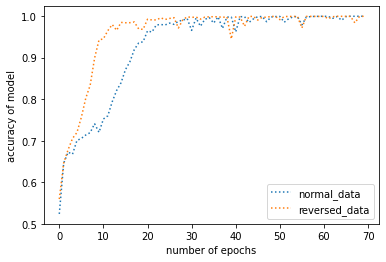

In [80]:
b.graph(model_a,model_b)

In [81]:

b.one_hot_x[1]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

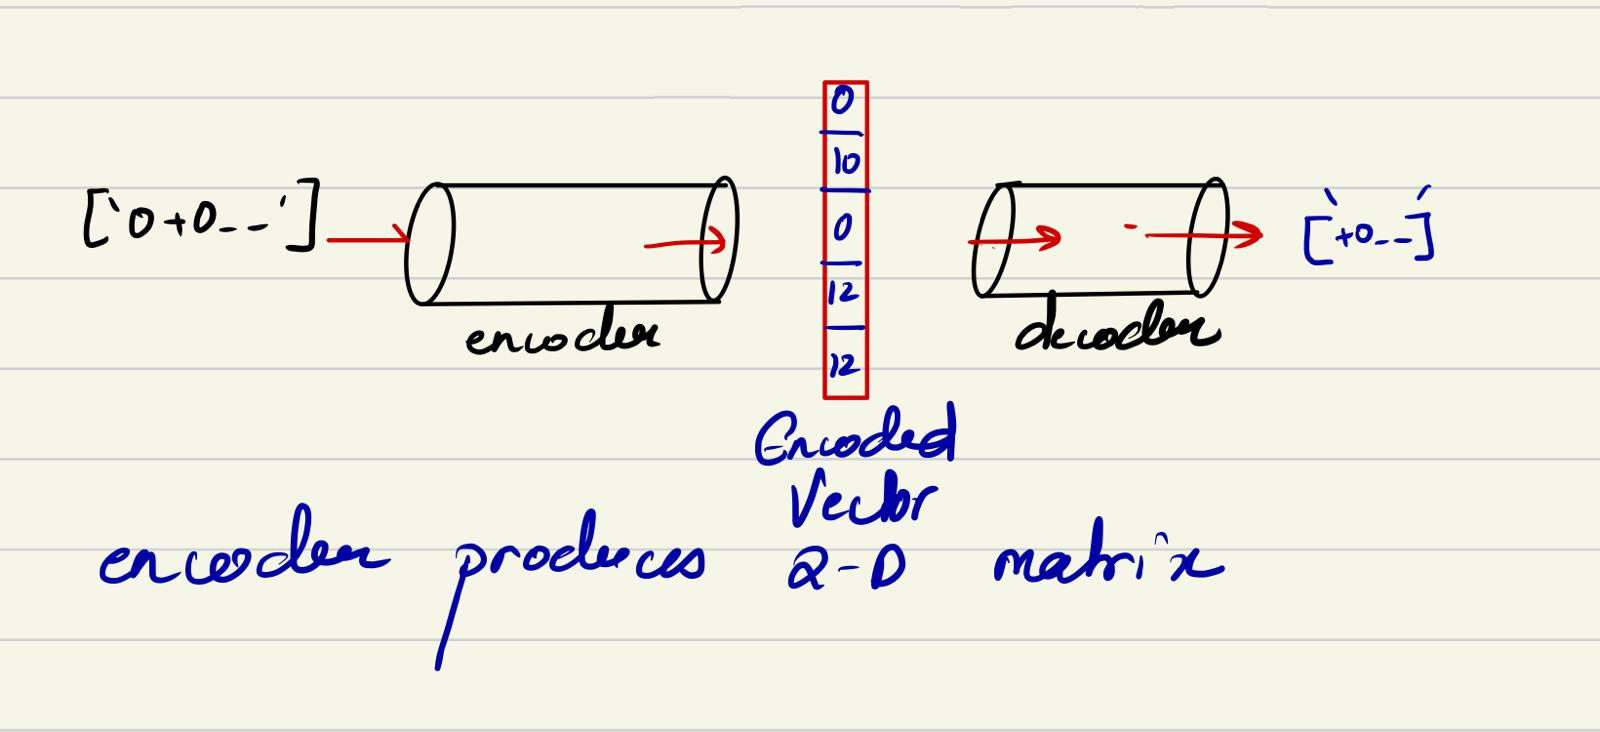

Encoder Decoder, it is a machine learning model with two neural networks at its core.Typically, the two neural networks share a similar structure. While the second one operates backward, the first one will be utilized normally.
A deep learning architecture called long short-term memory (LSTM) is built on an artificial recurrent neural network (RNN). For situations requiring sequences and time series, LSTMs provide a practical solution.
The RepeatVector layer adds an extra dimension to the dataset . 


Here the first layer is encoder it gives ouput a vector and takes input sequence of characters while decoder gives ouput the predicted sequence and take input vector . Here repeat vector basically adds extra dimension and helps basically by repeating the incoming inputs a specific number of times